In [5]:
import numpy as np 
import pandas as pd 
from scipy import linalg
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
from sklearn.neighbors import NearestNeighbors

np.random.seed(100)  

## 1. Loading the Data


In [20]:
#Data composited every 2 metres
two_composite = pd.read_csv("../Curated_data/two_composite.csv", low_memory=False)

In [17]:
kevitsa_composites = pd.read_csv("../Curated_data/Kevitsa_composites_2m.csv", low_memory=False)


In [21]:
two_composite

Sample Number   Name  Depth From  Depth To           X           Y  \
0                  1  KEV_1         0.0       2.0  3498947.63  7511204.97   
1                  2  KEV_1         2.0       4.0  3498948.84  7511204.92   
2                  3  KEV_1         4.0       6.0  3498950.05  7511204.87   
3                  4  KEV_1         6.0       8.0  3498951.26  7511204.82   
4                  5  KEV_1         8.0      10.0  3498952.47  7511204.77   
...              ...    ...         ...       ...         ...         ...   
97858          97859   R728        96.0      98.0  3498735.00  7510855.00   
97859          97860   R728        98.0     100.0  3498735.00  7510855.00   
97860          97861   R728       100.0     102.0  3498735.00  7510855.00   
97861          97862   R728       102.0     104.0  3498735.00  7510855.00   
97862          97863   R728       104.0     106.0  3498735.00  7510855.00   

            Z  Length Alt1_Code Alt1_Int  ... Te_ppm Th_ppm Ti_pct Tl_ppm  \
0      236.38     2.0       NaN      NaN  ...    NaN    NaN    NaN    NaN   
1      234.79     2.0       NaN      NaN  ...    NaN    NaN    NaN    NaN   
2      233.20     2.0       NaN      NaN  ...    NaN    NaN    NaN    NaN   
3      231.61     2.0       NaN      NaN  ...    NaN    NaN    NaN    NaN   
4      230.01     2.0       NaN      NaN  ...    NaN    NaN    NaN    NaN   
...       ...     ...       ...      ...  ...    ...    ...    ...    ...   
97858  116.50     2.0       NaN      NaN  ...    NaN   1.37   0.11    NaN   
97859  114.50     2.0       NaN      NaN  ...    NaN   0.81   0.12    NaN   
97860  112.50     2.0       NaN      NaN  ...    NaN   0.97   0.15    NaN   
97861  110.50     2.0       NaN      NaN  ...    NaN   0.85   0.12    NaN   
97862  108.50     2.0       NaN      NaN  ...    NaN   2.26    NaN    NaN   

       U_ppm  V_ppm  W_ppm  Y_ppm  Zn_ppm  Zr_ppm  
0        NaN    NaN    NaN    NaN     NaN     NaN  
1        NaN    NaN    NaN    NaN     NaN     NaN  
2        NaN    NaN    NaN    NaN     NaN     NaN  
3        NaN    NaN    NaN    NaN     NaN     NaN  
4        NaN    NaN    NaN    NaN     NaN     NaN  
...      ...    ...    ...    ...     ...     ...  
97858    NaN  65.10    NaN   2.24    5.13     NaN  
97859    NaN  64.00    NaN   1.48    7.87     NaN  
97860    NaN  60.43    NaN   2.56    8.55     NaN  
97861    NaN  41.20    NaN   1.41    7.94     NaN  
97862    NaN  35.50    NaN   1.08    7.46     NaN  

[97863 rows x 161 columns]

In [22]:
kevitsa_composites

Sample Number   Name  Depth From  Depth To           X           Y  \
0                  1  KEV_1         0.0       2.0  3498947.63  7511204.97   
1                  2  KEV_1         2.0       4.0  3498948.84  7511204.92   
2                  3  KEV_1         4.0       6.0  3498950.05  7511204.87   
3                  4  KEV_1         6.0       8.0  3498951.26  7511204.82   
4                  5  KEV_1         8.0      10.0  3498952.47  7511204.77   
...              ...    ...         ...       ...         ...         ...   
97858          97859   R728        96.0      98.0  3498735.00  7510855.00   
97859          97860   R728        98.0     100.0  3498735.00  7510855.00   
97860          97861   R728       100.0     102.0  3498735.00  7510855.00   
97861          97862   R728       102.0     104.0  3498735.00  7510855.00   
97862          97863   R728       104.0     106.0  3498735.00  7510855.00   

            Z  Length  Ag_ppm  Al_pct  ... Vein1_Pct Vein1_Style Vein2_Comp  \
0      236.38     2.0     NaN     NaN  ...       NaN         NaN        NaN   
1      234.79     2.0     NaN     NaN  ...       NaN         NaN        NaN   
2      233.20     2.0     NaN     NaN  ...       NaN         NaN        NaN   
3      231.61     2.0     NaN     NaN  ...       NaN         NaN        NaN   
4      230.01     2.0     NaN     NaN  ...       NaN         NaN        NaN   
...       ...     ...     ...     ...  ...       ...         ...        ...   
97858  116.50     2.0    0.51    1.39  ...       NaN         NaN        NaN   
97859  114.50     2.0    0.25    1.67  ...       NaN         NaN        NaN   
97860  112.50     2.0    0.38    1.46  ...       NaN         NaN        NaN   
97861  110.50     2.0    0.16    1.20  ...       NaN         NaN        NaN   
97862  108.50     2.0    0.47    1.15  ...       NaN         NaN        NaN   

      Vein2_Pct Vein2_Style W_ppm  Weathering  Y_ppm  Zn_ppm  Zr_ppm  
0           NaN         NaN   NaN         NaN    NaN     NaN     NaN  
1           NaN         NaN   NaN         NaN    NaN     NaN     NaN  
2           NaN         NaN   NaN         NaN    NaN     NaN     NaN  
3           NaN         NaN   NaN         NaN    NaN     NaN     NaN  
4           NaN         NaN   NaN         NaN    NaN     NaN     NaN  
...         ...         ...   ...         ...    ...     ...     ...  
97858       NaN         NaN   NaN         NaN   2.24    5.13     NaN  
97859       NaN         NaN   NaN         NaN   1.48    7.87     NaN  
97860       NaN         NaN   NaN         NaN   2.56    8.55     NaN  
97861       NaN         NaN   NaN         NaN   1.41    7.94     NaN  
97862       NaN         NaN   NaN         NaN   1.08    7.46     NaN  

[97863 rows x 161 columns]

In [29]:
kevitsa_composites.sort_index(axis=1)

Ag_ppm  Al_pct Alt1_Code Alt1_Int Alt1_Style Alt2_Code Alt2_Int  \
0         NaN     NaN       NaN      NaN        NaN       NaN      NaN   
1         NaN     NaN       NaN      NaN        NaN       NaN      NaN   
2         NaN     NaN       NaN      NaN        NaN       NaN      NaN   
3         NaN     NaN       NaN      NaN        NaN       NaN      NaN   
4         NaN     NaN       NaN      NaN        NaN       NaN      NaN   
...       ...     ...       ...      ...        ...       ...      ...   
97858    0.51    1.39       NaN      NaN        NaN       NaN      NaN   
97859    0.25    1.67       NaN      NaN        NaN       NaN      NaN   
97860    0.38    1.46       NaN      NaN        NaN       NaN      NaN   
97861    0.16    1.20       NaN      NaN        NaN       NaN      NaN   
97862    0.47    1.15       NaN      NaN        NaN       NaN      NaN   

      Alt2_Style  Ars_ppm  Au_ppb  ...  Vein2_Style  W_ppm  Weathering  \
0            NaN      NaN     NaN  ...          NaN    NaN         NaN   
1            NaN      NaN     NaN  ...          NaN    NaN         NaN   
2            NaN      NaN     NaN  ...          NaN    NaN         NaN   
3            NaN      NaN     NaN  ...          NaN    NaN         NaN   
4            NaN      NaN     NaN  ...          NaN    NaN         NaN   
...          ...      ...     ...  ...          ...    ...         ...   
97858        NaN     0.00     0.0  ...          NaN    NaN         NaN   
97859        NaN     0.00     0.0  ...          NaN    NaN         NaN   
97860        NaN     1.39     0.0  ...          NaN    NaN         NaN   
97861        NaN     5.31     0.9  ...          NaN    NaN         NaN   
97862        NaN     8.39     1.0  ...          NaN    NaN         NaN   

                X           Y  Y_ppm       Z  Zn_ppm  Zr_ppm samp_id  
0      3498947.63  7511204.97    NaN  236.38     NaN     NaN       0  
1      3498948.84  7511204.92    NaN  234.79     NaN     NaN       0  
2      3498950.05  7511204.87    NaN  233.20     NaN     NaN       0  
3      3498951.26  7511204.82    NaN  231.61     NaN     NaN       0  
4      3498952.47  7511204.77    NaN  230.01     NaN     NaN       0  
...           ...         ...    ...     ...     ...     ...     ...  
97858  3498735.00  7510855.00   2.24  116.50    5.13     NaN       0  
97859  3498735.00  7510855.00   1.48  114.50    7.87     NaN       0  
97860  3498735.00  7510855.00   2.56  112.50    8.55     NaN       0  
97861  3498735.00  7510855.00   1.41  110.50    7.94     NaN       0  
97862  3498735.00  7510855.00   1.08  108.50    7.46     NaN       0  

[97863 rows x 161 columns]

In [28]:
two_composite.sort_index(axis=1)

Ag_ppm  Al_pct Alt1_Code Alt1_Int Alt1_Style Alt2_Code Alt2_Int  \
0         NaN     NaN       NaN      NaN        NaN       NaN      NaN   
1         NaN     NaN       NaN      NaN        NaN       NaN      NaN   
2         NaN     NaN       NaN      NaN        NaN       NaN      NaN   
3         NaN     NaN       NaN      NaN        NaN       NaN      NaN   
4         NaN     NaN       NaN      NaN        NaN       NaN      NaN   
...       ...     ...       ...      ...        ...       ...      ...   
97858    0.51    1.39       NaN      NaN        NaN       NaN      NaN   
97859    0.25    1.67       NaN      NaN        NaN       NaN      NaN   
97860    0.38    1.46       NaN      NaN        NaN       NaN      NaN   
97861    0.16    1.20       NaN      NaN        NaN       NaN      NaN   
97862    0.47    1.15       NaN      NaN        NaN       NaN      NaN   

      Alt2_Style  Ars_ppm  Au_ppb  ...  Vein2_Style  W_ppm  Weathering  \
0            NaN      NaN     NaN  ...          NaN    NaN         NaN   
1            NaN      NaN     NaN  ...          NaN    NaN         NaN   
2            NaN      NaN     NaN  ...          NaN    NaN         NaN   
3            NaN      NaN     NaN  ...          NaN    NaN         NaN   
4            NaN      NaN     NaN  ...          NaN    NaN         NaN   
...          ...      ...     ...  ...          ...    ...         ...   
97858        NaN      NaN     0.0  ...          NaN    NaN         NaN   
97859        NaN      NaN     0.0  ...          NaN    NaN         NaN   
97860        NaN     1.39     0.0  ...          NaN    NaN         NaN   
97861        NaN     5.31     0.9  ...          NaN    NaN         NaN   
97862        NaN     8.39     1.0  ...          NaN    NaN         NaN   

                X           Y  Y_ppm       Z  Zn_ppm  Zr_ppm samp_id  
0      3498947.63  7511204.97    NaN  236.38     NaN     NaN       0  
1      3498948.84  7511204.92    NaN  234.79     NaN     NaN       0  
2      3498950.05  7511204.87    NaN  233.20     NaN     NaN       0  
3      3498951.26  7511204.82    NaN  231.61     NaN     NaN       0  
4      3498952.47  7511204.77    NaN  230.01     NaN     NaN       0  
...           ...         ...    ...     ...     ...     ...     ...  
97858  3498735.00  7510855.00   2.24  116.50    5.13     NaN       0  
97859  3498735.00  7510855.00   1.48  114.50    7.87     NaN       0  
97860  3498735.00  7510855.00   2.56  112.50    8.55     NaN       0  
97861  3498735.00  7510855.00   1.41  110.50    7.94     NaN       0  
97862  3498735.00  7510855.00   1.08  108.50    7.46     NaN       0  

[97863 rows x 161 columns]

In [30]:
# Step 1: Sort the column names
two_composite_sorted_columns = sorted(two_composite.columns)
kevitsa_composites_sorted_columns = sorted(kevitsa_composites.columns)

# Step 2: Check if the sorted column names are the same
if two_composite_sorted_columns == kevitsa_composites_sorted_columns:
    # Step 3: Compare the values of corresponding columns
    are_equal = two_composite.sort_index(axis=1).equals(kevitsa_composites.sort_index(axis=1))
    if are_equal:
        print("The DataFrames have the same information with columns in different order.")
    else:
        print("The DataFrames have different information.")
else:
    print("The column names are different, indicating the DataFrames have different structures.")


The DataFrames have different information.


# 2. Clustering

In [7]:
from sklearn.cluster import DBSCAN
import numpy as np

In [8]:
data = two_composite_filtered.iloc[:, 4:7]
data = np.array(data)

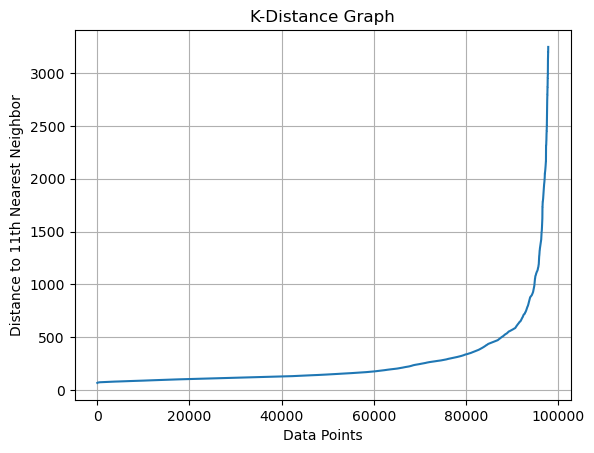

In [9]:


# Calculate distances to the k-nearest neighbors
nn = NearestNeighbors(n_neighbors=1000)  # Adjust k as needed
nn.fit(data)
distances, _ = nn.kneighbors(data)

# Sort the distances
sorted_distances = np.sort(distances[:, -1])

# Plot the k-distance graph
plt.plot(range(len(data)), sorted_distances)
plt.xlabel("Data Points")
plt.ylabel("Distance to 11th Nearest Neighbor")
plt.title("K-Distance Graph")
plt.grid()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

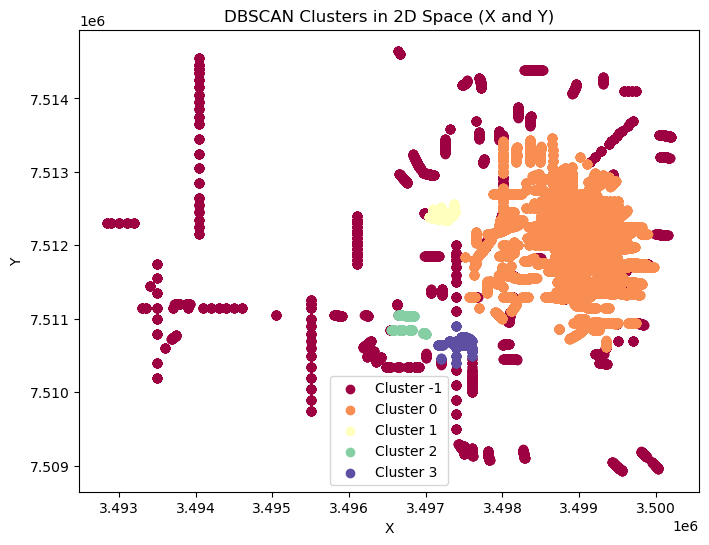

In [10]:
from sklearn.cluster import DBSCAN

epsilon = 250 
dbscan = DBSCAN(eps=epsilon, min_samples=500)  # Adjust min_samples as needed
clusters = dbscan.fit_predict(data)


import matplotlib.pyplot as plt

# Assuming you have already applied DBSCAN and obtained the 'clusters' labels

# Create a 2D scatter plot with two dimensions (X and Y)
plt.figure(figsize=(8, 6))

# Get unique cluster labels
unique_labels = np.unique(clusters)

# Define colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each point with a unique color based on its cluster label
for label, color in zip(unique_labels, colors):
    cluster_points = data[clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clusters in 2D Space (X and Y)')

plt.legend()
plt.show()


In [11]:
epsilon = 250 
dbscan = DBSCAN(eps=epsilon, min_samples=800)  # Adjust min_samples as needed
clusters = dbscan.fit_predict(data)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


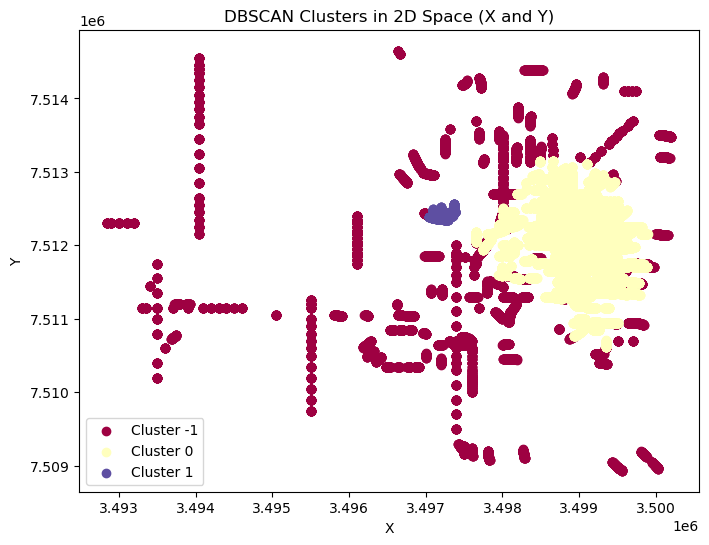

In [12]:
import matplotlib.pyplot as plt

# Assuming you have already applied DBSCAN and obtained the 'clusters' labels

# Create a 2D scatter plot with two dimensions (X and Y)
plt.figure(figsize=(8, 6))

# Get unique cluster labels
unique_labels = np.unique(clusters)

# Define colors for each cluster
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot each point with a unique color based on its cluster label
for label, color in zip(unique_labels, colors):
    cluster_points = data[clusters == label]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('DBSCAN Clusters in 2D Space (X and Y)')

plt.legend()
plt.show()


In [13]:
# Assuming 'clusters' contains cluster labels and 'two_composite_filtered' is your original DataFrame
cluster_label_to_select = 0  # The cluster label you want to select

# Filter the DataFrame to select only the data points in cluster 0
cluster_0_data = two_composite_filtered[clusters == cluster_label_to_select]

# 'cluster_0_data' now contains only the data points in cluster 0
# Assuming cluster_0_data is the DataFrame you want to save and you have a filename in mind
filename = "cluster_0_data.csv"

# Save the DataFrame as a CSV file
cluster_0_data.to_csv(filename, index=False)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


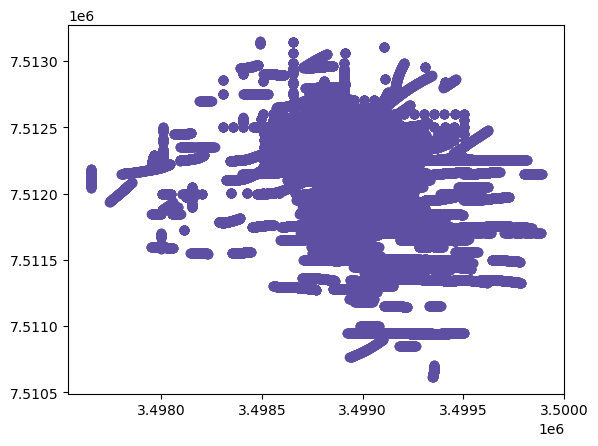

In [14]:
    cluster_points = data[clusters == 0]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {label}')